# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo VII - Dados não estruturados: sinais e imagens</span>


### <span style="color:darkred">Representações digitais de dados não estruturados: imagens e sinais</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

__Conteúdo:__
1. Representações digitais de dados sequenciais e espaciais
2. Sinais e propriedades
3. Imagens e propriedades


__Referência complementar__

GONZALES, R.C.; WOODS, R.E. **Processamento Digital de Imagens**. 3.ed. 2010.

***

## Representações digitais de sinais e imagens

Possuem propriedades **sequenciais** e **espaciais**

* Sequenciais: séries temporais, sinais, etc.
* Espaciais: imagens, mapas, etc.

### Sequenciais:

> Um ponto amostrado afeta a probabilidade do próximo ponto.

Esse tipo de dado não possui a caracerística (i)ndependente e (i)denticamente (d)istribuído - i.i.d.

* **Dados sequenciais**: a ordenação dos dados importa, não necessariamente no domínio temporal.
    * Texto
    * Sequências de DNA
    
    
* **Séries temporais**: dados coletados em intervalos de tempo, regulares ou não. A frequência de aquisição pode variar: milissegundos, semanas, etc.
    * Dados de clima
    * Mercado de ações
    * Moedas e câmbio
    
    
* **Sinais**: comumente coletados por sensores a uma taxa alta de amostragem (medida em Hertz / Hz), com muitos pontos por unidade de tempo.
    * Músicas
    * Fala
    * Acelerometria e dados inerciais

### Espaciais

Esse tipo de dado comumente também não é i.i.d., mas aqui há uma dependência em termos de uma vizinhança, comumente definida em uma grade regular.

**Imagens** são a manifestação mais comum desse tipo de dados, como:
* Fotografias
* Clip-art / vetorial 2D
* Arte-vetorial 3D
* Desenhos

Também são coletados e armazenados dados em grade regular para outras aplicações como *mapas* e *superfícies*.

**Grafos** também são representações que permite organização espacial, porém não em uma grade regular

---
## <font color="blue">Sinais</font>

São comumente representados como uma função matemática $f(x)$, em que $x$ pode representar o tempo em que um determinado valor $f(x)$ foi observado.

O conceito de **resolução** é importante aqui, pois define quantos pontos foram amostrados em uma certa unidade de tempo.
* relacionado à *frequência* de aquisição em Hz (ciclos por segundo).

Um sinal amostrado a 100 Hz possui 100 pontos para cada segundo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define amostragem ao longo do tempo
F = 10
# define os segundos
secs = 1
# prepara o eixo real onde iremos amostrar a funcao
x = np.arange(0, secs, (1/F))
print(x)

# computa a funcao
f_x = 0.5 + 0.1*x + x**2 
f_x

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


array([0.5 , 0.52, 0.56, 0.62, 0.7 , 0.8 , 0.92, 1.06, 1.22, 1.4 ])

Text(0.5, 1.0, 'Pontos: 10 - interpolados')

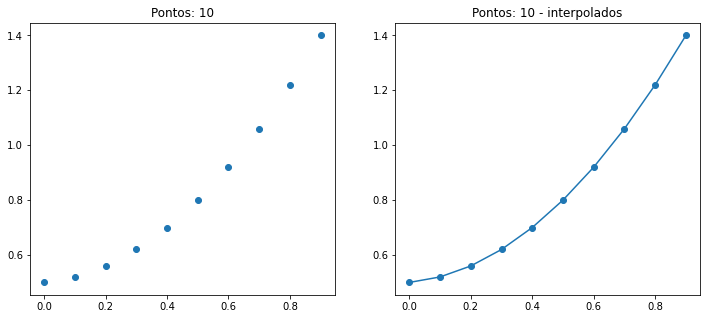

In [2]:
# exibe a funcao num gráfico
plt.figure(figsize=(12,5))
plt.subplot(121); plt.plot(x, f_x, 'o')
plt.title("Pontos: %d" % x.shape)
plt.subplot(122); plt.plot(x, f_x, 'o-')
plt.title("Pontos: %d - interpolados" % x.shape)

---
Vemos então que a **representação digital de sinais ou sequencias** de dados é feita na forma vetorial, com uma sequência de valores numéricos.

Seguindo essa ideia podemos representar diferentes padrões de variação sequencial.

Text(0.5, 1.0, 'Pontos: 100')

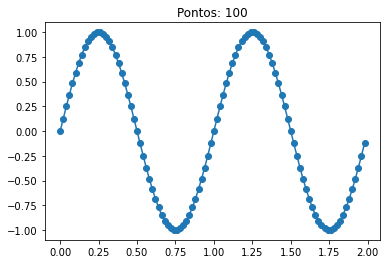

In [3]:
# define amostragem ao longo do tempo
F = 50
# define os segundos
secs = 2
# prepara o eixo ao longo do qual iremos amostrar a funcao
x = np.arange(0, secs, (1/F))

# computa a funcao
f_sin = np.sin(x * 2 * np.pi)

plt.plot(x, f_sin, 'o-')
plt.title("Pontos: %d" % x.shape)

Text(0.5, 1.0, 'Pontos: 500')

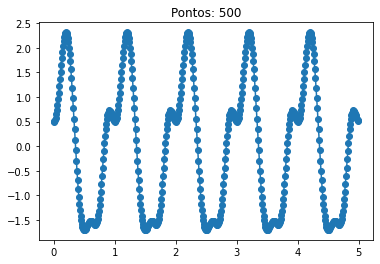

In [4]:
# define amostragem ao longo do tempo
F = 100
# define os segundos
secs = 5
# prepara o eixo ao longo do qual iremos amostrar a funcao
t = np.arange(0, secs, (1/F))

# combinacao de senos e cossenos
f =  1.6*(np.sin(t*2*np.pi)**3) +1.3*np.cos(t*2*np.pi) -0.5*np.cos(2*t*2*np.pi) -0.2*np.cos(3*t*2*np.pi) - 0.1*np.cos(4*t*2*np.pi)

plt.plot(t, f, 'o-')
plt.title("Pontos: %d" % f.shape)

Text(0.5, 1.0, 'Pontos: 400')

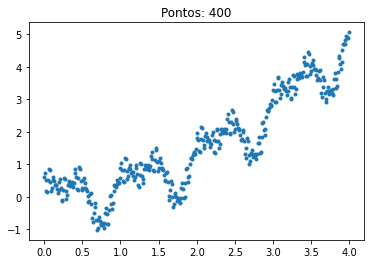

In [5]:
# define amostragem ao longo do tempo
F = 100
# define os segundos
secs = 4
# prepara o eixo ao longo do qual iremos amostrar a funcao
x = np.arange(0, secs, (1/F))

# computa a funcao
f_com = 0.2*np.sin(x * 2 * np.pi*20) + 0.2*np.cos(x * 2 * np.pi * 15) + 0.4*np.cos(x * 2 * np.pi*2) + 0.6*np.sin(x * 2 * np.pi) + 0.3*x**2 

plt.plot(x, f_com, '.')
plt.title("Pontos: %d" % x.shape)


Text(0.5, 1.0, 'Pontos: 400')

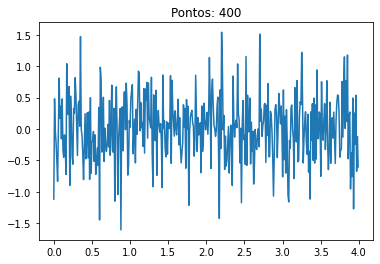

In [6]:
f_rnd = np.random.randn(x.shape[0])*0.5
plt.plot(x, f_rnd)
plt.title("Pontos: %d" % x.shape)

---
## <font color="blue">Imagens</font>

Escritos como uma função $f(x,y)$, em que $x,y$ representam coordenadas espaciais onde $f(x,y)$ foi observado.

O conceito de **resolução** espacial define quantos pontos foram amostrados em um certo espaço planar.
* pixels (ou megapixels), representam o valor absoluto da quantidade de pontos
* pontos por polegada, representando quantos pixels por polegada (unidade que equivale a $\approx 2.5$ cm) foram capturados
* pixels por centímetro quadrado

Resolução = 240 x 360 = 86400


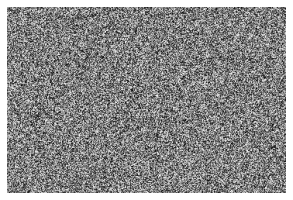

In [4]:
# tamanho (resolucao) da imagem
n = 240
m = 360

# criando uma imagem aleatória com valores entre 0 e 255
f_rnd = np.random.randint(0,256,[n,m])

plt.figure(figsize=(5,5))
plt.imshow(f_rnd, cmap="gray")
plt.axis('off')
print("Resolução = %d x %d = %d" % (n,m, n*m))

In [12]:
f_rnd[6,10]

210

In [13]:
np.max(f_rnd)

255

In [6]:
# agora uma imagem criada a partir de uma função linear
n = 32
m = 32
x = np.arange(n)/(n-1)
y = np.arange(m)/(m-1)
print(x)

[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871
 0.58064516 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548
 0.77419355 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387
 0.96774194 1.        ]


In [7]:
x.shape = (n,1) # cria vetor coluna
y.shape = (1,m) # cria vetor linha
print(x)
print(y)

[[0.        ]
 [0.03225806]
 [0.06451613]
 [0.09677419]
 [0.12903226]
 [0.16129032]
 [0.19354839]
 [0.22580645]
 [0.25806452]
 [0.29032258]
 [0.32258065]
 [0.35483871]
 [0.38709677]
 [0.41935484]
 [0.4516129 ]
 [0.48387097]
 [0.51612903]
 [0.5483871 ]
 [0.58064516]
 [0.61290323]
 [0.64516129]
 [0.67741935]
 [0.70967742]
 [0.74193548]
 [0.77419355]
 [0.80645161]
 [0.83870968]
 [0.87096774]
 [0.90322581]
 [0.93548387]
 [0.96774194]
 [1.        ]]
[[0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
  0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
  0.38709677 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871
  0.58064516 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548
  0.77419355 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387
  0.96774194 1.        ]]


In [8]:
# cria matriz multiplicando os vetores x.y
f_xy = x.dot(y)

(-0.5, 31.5, 31.5, -0.5)

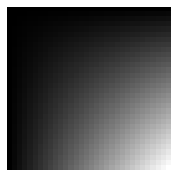

In [9]:
plt.figure(figsize=(3,3))
plt.imshow(f_xy, cmap="gray")
plt.axis('off')

In [21]:
f_xy[31,31]

1.0

In [22]:
np.max(f_xy)

1.0

In [23]:
32*32

1024

In [24]:
len(np.unique(f_xy))

352

Notamos que os valores dessa matriz estão aproximadamente entre 0 e 1, organizados de forma **espacial** nas coordenadas $(x,y)$

* primeira imagem: valores não estão correlacioandos
* segunda imagem: há relação entre os valores nas direções $x$ e $y$

---
Em imagens de tons de cinza, temos uma representação de **1 byte por pixel**

Assim, o monitor sempre exibirá 256 tons de cinza distintos.

A segunda matriz que exibimos possui mais valores, porém foi normalizada na visualização para valores entre 0 (preto) e 255 (branco).

In [25]:
# transformando em imagem tons de cinza
f_xy_uint = (f_xy*255).astype(np.uint8)
f_xy_uint[1:5,1:5]

array([[0, 0, 0, 1],
       [0, 1, 1, 2],
       [0, 1, 2, 3],
       [1, 2, 3, 4]], dtype=uint8)

In [26]:
f_xy[1:5,1:5]

array([[0.00104058, 0.00208117, 0.00312175, 0.00416233],
       [0.00208117, 0.00416233, 0.0062435 , 0.00832466],
       [0.00312175, 0.0062435 , 0.00936524, 0.01248699],
       [0.00416233, 0.00832466, 0.01248699, 0.01664932]])

Valores únicos float =  352
Valores únicos uint8 =  186


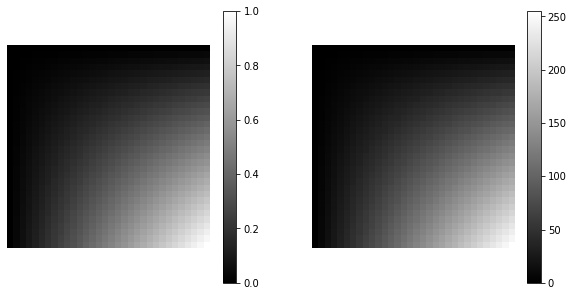

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(f_xy, cmap="gray"); plt.colorbar()
plt.axis('off')
plt.subplot(122)
plt.imshow(f_xy_uint, cmap="gray"); plt.colorbar()
plt.axis('off')

print("Valores únicos float = ",np.shape(np.unique(f_xy))[0])
print("Valores únicos uint8 = ",np.shape(np.unique(f_xy_uint))[0])

---
Imagens coloridas são comumente representadas por 3 matrizes:
* R - vermelho
* G - verde
* B - azul

vamos usar 3 matrizes para combinar as cores-luz primária R, G e B:

In [10]:
n = 32
m = 32
f_R = np.zeros([n,m]).astype(np.uint8)
f_G = np.zeros([n,m]).astype(np.uint8)
f_B = np.zeros([n,m]).astype(np.uint8)

n2 = n//2
m2 = m//2
f_R[:n2+2,:m2+2] = 255
f_G[n2-2:,:m2+2] = 255
f_B[n2-8:-8,m2-2:] = 255

f_col = np.empty([n,m,3]).astype(np.uint8)
f_col[:,:,0] = f_R
f_col[:,:,1] = f_G
f_col[:,:,2] = f_B

Text(0.5, 1.0, 'B')

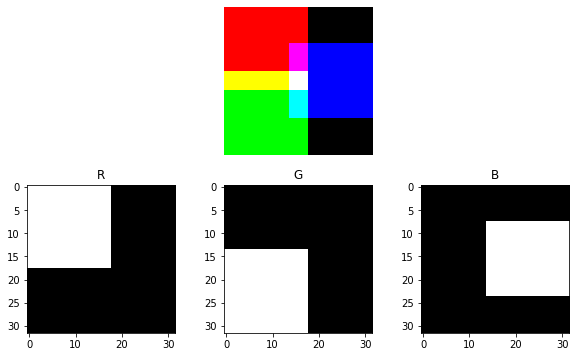

In [29]:
plt.figure(figsize=(10,6))
plt.subplot(232)
plt.imshow(f_col)
plt.axis('off')
plt.subplot(234); 
plt.imshow(f_R, cmap="gray", vmin=0, vmax=255); plt.title('R')
plt.subplot(235); 
plt.imshow(f_G, cmap="gray", vmin=0, vmax=255); plt.title('G')
plt.subplot(236); 
plt.imshow(f_B, cmap="gray", vmin=0, vmax=255); plt.title('B')

---
Assim, cada pixel é representado por 8 x 3 bits = 24 bits, sendo possível codificar
$2^{24} \approx 16$ milhões de cores

In [30]:
2**24

16777216

Há outros espaços de cor possíveis, como o HSV que divide os canais em Matiz (Hue), Saturação (Saturation) e Valor (Value).

### Resumo:

* Dados não estruturados sequenciais
    * medidas tomadas em sequência, em que comumente uma medida influencia a probabilidade da próxima
    * comumente representados por séries temporais ou sinais

* Dados não estruturados espaciais
    * a dependência agora pode existir espacialmente em duas direções
    * os dados podem ser de qualquer tipo
    * mas para visualização imagens em tons de cinza (1 byte/pixel) ou RGB coloridas (3 bytes/pixel)